# Team: Baye'si'Boys
Abhishek Tomar, 19156111, 100% (Team Representative)
<br>Sumit Bhadauria, 19143761, 100%
<br>Tauseef Khan, 19140886, 100%
<br>Fakhre Alam, 19098448, 100%
<br>Sahil Deshpande, 19137818, 100%

# Summary
One of the most important software engineering problem is to determine the probability that a program will have bugs and thus test its performance indirectly. The given dataset contains a list of 21 characteristics that can be used to forecast software errors.
<br> We first check the nature of the problem, which is classification i.e. we need to classify every instance into one of the two possible categories (0 or 1) meaning "No bug" and "Bug" respectively. In order to achieve the same, we go through the following step by step method to identify the best suited algorithm that does thi job as follows:
 
# 1. Identify the baseline accuracy
First, we load the train and test dataset and quickly look for the majority class "Category" in the train dataset. It shows us that the Class 0 i.e. "No bugs" has a frequency of approximately 0.808, which means that any mode we come up with has to improve on this value to the maximum extent.

# 2. Data Pre processing
We now check for the data head and shape to get an understanding of the data we are working on, and also check for the data types of all variables. Then, we next look at the possibility of Null values in data, and if there are any, we convert them to NaN (Not a number) values.

# 3. Data Standardisation and Preparation
a) We now check for Multicollinearity among all pairs of variables.
<br>b) We looked at the data skew and sorted them in descending order. It showed varying data ranges for various columns that might put bias in the model. 
<br>c) We then convert the data into three numpy arrays, one for customer ID, second for inputs, and the last one for output.
<br>d) We then tried checking for data scaling, standardisation, and normalisation and found out that Standard Scaling is most suited for the given dataset. Therefore, we used the StandardScaling function to scale the data into [0,1] range. 
<br>e) Now, we checked the data description again and found that it is in the desired range of values.

# 4. Compare Algorithms
We have used 10 algorithms for comparing the relative performances amongst Nearest Neighbors, Linear SVM, RBF SVM, XGBoost, Decision Tree, Random Forest, MultiLayerPerceptron, AdaBoost, Naive Bayes, and Logistic Regression. We used 10-fold cross valiation to check the generalisation error. 

# 5. Parameter Tuning
When we used 'Category' variable in Scaling, then the model accuracy was 1.00 without parameter tuning. However, since that is a flawed logic, we removed 'Category' from the Standard Scaling and checked the accuracy, it was coming to 0.8159. Now, we employed the parameter tuning methods that improved this accuracy to 0.8564.  

# 6. Results and Model Strengths/Weaknesses
7 out of the 10 models used gave an accuracy of 1.00 and we chose XGBoost algorithm in our model as it is a Boosting algorithm and stronger than others. 
<br> We realise that the accuracy is very high but still used the Parameter tuning for XGBoost, which took a very long time making the model slower, hence it may be discarded for higher accuracy or kept for better process following. 
<br> The model strengths and weakness are also discussed at the end of this notebook.

# Implementation
Step 1: Loading the data

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import time
%matplotlib inline

#loading the dataset
df_train = pd.read_csv("train.csv")
df_train

,Id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,Category
0,8255,25.0,4.0,1.0,4.0,82.0,385.44,0.07,15.00,25.70,...,17.0,0.0,3.0,0.0,13.0,13.0,52.0,30.0,7.0,0
1,7507,40.0,12.0,12.0,12.0,146.0,806.44,0.06,17.29,46.63,...,36.0,0.0,2.0,0.0,17.0,29.0,87.0,59.0,23.0,0
2,6758,52.0,2.0,1.0,2.0,227.0,981.08,0.01,86.33,11.36,...,36.0,3.0,10.0,0.0,14.0,6.0,153.0,74.0,3.0,0
3,19,85.0,9.0,1.0,7.0,277.0,1714.58,0.03,32.64,52.53,...,69.0,0.0,14.0,0.0,26.0,47.0,161.0,118.0,13.0,1
4,1299,38.0,4.0,1.0,1.0,210.0,1117.60,0.04,24.23,46.12,...,29.0,0.0,7.0,0.0,14.0,26.0,120.0,90.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,5738,17.0,2.0,1.0,2.0,45.0,211.52,0.14,7.29,29.03,...,10.0,1.0,3.0,0.0,12.0,14.0,28.0,17.0,3.0,0
9376,5195,14.0,3.0,3.0,2.0,31.0,133.98,0.09,11.14,12.02,...,10.0,0.0,2.0,0.0,13.0,7.0,19.0,12.0,5.0,0
9377,5394,20.0,2.0,1.0,2.0,85.0,384.50,0.05,18.67,20.60,...,14.0,3.0,1.0,0.0,14.0,9.0,61.0,24.0,3.0,0
9378,862,33.0,4.0,3.0,2.0,90.0,454.00,0.04,24.43,18.58,...,18.0,5.0,8.0,0.0,19.0,14.0,54.0,36.0,7.0,1


In [2]:
#loading the test dataset
df_test = pd.read_csv("test.csv")
df_test

,Id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,10490,4.0,1.0,1.0,1.0,10.0,31.70,0.40,2.50,12.68,...,4.40,2.0,0.0,0.0,0.0,5.0,4.0,6.0,4.0,1.0
1,7211,144.0,13.0,4.0,11.0,568.0,3445.54,0.02,61.01,56.47,...,11678.83,91.0,26.0,18.0,6.0,25.0,42.0,363.0,205.0,25.0
2,7109,7.0,2.0,1.0,2.0,13.0,43.19,0.27,3.75,11.52,...,9.00,5.0,0.0,0.0,0.0,6.0,4.0,8.0,5.0,3.0
3,5567,31.0,10.0,1.0,2.0,115.0,599.09,0.05,19.98,29.99,...,664.82,22.0,3.0,3.0,1.0,17.0,20.0,68.0,47.0,19.0
4,6677,4.0,1.0,1.0,1.0,5.0,11.61,0.67,1.50,7.74,...,0.97,2.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,8407,18.0,2.0,1.0,2.0,47.0,212.61,0.12,8.25,25.77,...,97.45,12.0,0.0,4.0,0.0,11.0,12.0,29.0,18.0,3.0
1496,186,40.0,5.0,1.0,5.0,132.0,711.79,0.05,20.00,35.59,...,790.87,29.0,4.0,5.0,0.0,20.0,22.0,88.0,44.0,9.0
1497,1761,226.0,9.0,1.0,9.0,782.0,5333.38,0.02,44.90,118.79,...,13303.49,162.0,13.0,49.0,0.0,24.0,89.0,449.0,333.0,15.0
1498,3776,23.0,3.0,1.0,2.0,126.0,661.24,0.05,19.80,33.40,...,727.36,18.0,0.0,3.0,0.0,18.0,20.0,82.0,44.0,5.0


# Data Visualisation

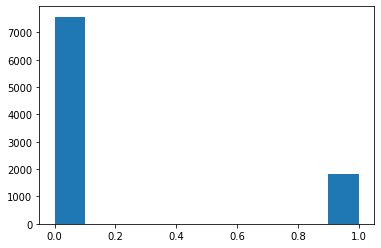

In [3]:
plt.hist(df_train.iloc[:,-1].values);

# Baseline ML Algorithm 
Here, we are identifying the "Most frequent" class and fitting the same to the algorithm

In [4]:
X_train = df_train.iloc[:,1:-1].values #we discard the first column Id
y_train = df_train.iloc[:,-1].values #we want to predict Category

from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy="most_frequent") #it implements the majority class classifier
clf.fit(X_train,y_train)

#input for the test set
X_test = df_test.iloc[:,1:].values

#prediction of the majority class classifier
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,clf.predict(X_train))
#The majority classifier has already accuarcy 0.808 in the train set

0.8075692963752665

# Baseline model Analysis
Now the model that we need to try should improve the algorithm accuracy from the already achieved 80.8 percent which means that if we classify every instance to "No defect" the model is expected to give the right result on 80.8 percent occasions. 

# Data Pre processing
We would now be doing data pre processing before implementing other algorithms in order to improve the accuracy from the current value of 0.808.
We would first like to have a look at the head of the data as follows:

In [6]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
#loading the dataset head and number of rows and columns
df_train = pd.read_csv("train.csv")
display(df_train.head())
display(df_train.shape)

,Id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,Category
0,8255,25.0,4.0,1.0,4.0,82.0,385.44,0.07,15.00,25.70,...,17.0,0.0,3.0,0.0,13.0,13.0,52.0,30.0,7.0,0
1,7507,40.0,12.0,12.0,12.0,146.0,806.44,0.06,17.29,46.63,...,36.0,0.0,2.0,0.0,17.0,29.0,87.0,59.0,23.0,0
2,6758,52.0,2.0,1.0,2.0,227.0,981.08,0.01,86.33,11.36,...,36.0,3.0,10.0,0.0,14.0,6.0,153.0,74.0,3.0,0
3,19,85.0,9.0,1.0,7.0,277.0,1714.58,0.03,32.64,52.53,...,69.0,0.0,14.0,0.0,26.0,47.0,161.0,118.0,13.0,1
4,1299,38.0,4.0,1.0,1.0,210.0,1117.60,0.04,24.23,46.12,...,29.0,0.0,7.0,0.0,14.0,26.0,120.0,90.0,7.0,1


(9380, 23)

Now we would check the head of test dataset the same way as we did for Train dataset.

In [7]:
df_test = pd.read_csv("test.csv")
#loading the dataset head and number of rows and columns
display(df_test.head())
display(df_test.shape)

,Id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,10490,4.0,1.0,1.0,1.0,10.0,31.70,0.40,2.50,12.68,...,4.40,2.0,0.0,0.0,0.0,5.0,4.0,6.0,4.0,1.0
1,7211,144.0,13.0,4.0,11.0,568.0,3445.54,0.02,61.01,56.47,...,11678.83,91.0,26.0,18.0,6.0,25.0,42.0,363.0,205.0,25.0
2,7109,7.0,2.0,1.0,2.0,13.0,43.19,0.27,3.75,11.52,...,9.00,5.0,0.0,0.0,0.0,6.0,4.0,8.0,5.0,3.0
3,5567,31.0,10.0,1.0,2.0,115.0,599.09,0.05,19.98,29.99,...,664.82,22.0,3.0,3.0,1.0,17.0,20.0,68.0,47.0,19.0
4,6677,4.0,1.0,1.0,1.0,5.0,11.61,0.67,1.50,7.74,...,0.97,2.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,1.0


(1500, 22)

Now we would have a look at the type of data in each column (attribute) and also if there are Null values in the data.
If there are Null values, we would need to change them to NaN (Not a Number) to do the right data cleaning.

In [8]:
#Defining the variable columns that stores all the columns of the dataset except 'ID' and 'Category'
columns = ['loc','v(g)','v(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']
#Examining Column data types and if there are missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 23 columns):
Id                   9380 non-null int64
loc                  9380 non-null float64
v(g)                 9380 non-null float64
ev(g)                9380 non-null float64
iv(g)                9380 non-null float64
n                    9380 non-null float64
v                    9380 non-null float64
l                    9380 non-null float64
d                    9380 non-null float64
i                    9380 non-null float64
e                    9380 non-null float64
b                    9380 non-null float64
t                    9380 non-null float64
lOCode               9380 non-null float64
lOComment            9380 non-null float64
lOBlank              9380 non-null float64
locCodeAndComment    9380 non-null float64
uniq_Op              9380 non-null float64
uniq_Opnd            9380 non-null float64
total_Op             9380 non-null float64
total_Opnd           9380 non-null 

# Understanding the Data
The above information shows that we have a total of 23 columns of data in the Train dataset with the following characteristics:
<br> 1. There are no Null values in the data, so we do not need to change any values to default or zero.
<br> 2. Only "ID" and "Category" variables are of integar type.
<br> 3. The other 21 variables of continuous type are all of the type "Float" which means they can take decimal values.
<br>
<br> To reduce human error, we would still check for missing values and convert to NaNs.

In [9]:
#Check missing value codes and convert to NaNs
object_col = df_train.select_dtypes(include=object).columns.tolist()
for col in object_col:
    print(df_train[col].value_counts(dropna=False)/df_train.shape[0],'\n')

In [10]:
#We would now check the description of the raw data given to us in the Training dataset.
df_train[columns].describe()

,loc,v(g),v(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9.380000e+03,...,9.380000e+03,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000
mean,42.027090,6.369446,6.369446,4.010810,114.581695,676.963606,0.134403,14.213208,29.376125,3.764530e+04,...,2.091406e+03,26.414286,2.701173,4.624094,0.361727,11.250128,16.847889,68.197249,46.500448,11.295991
std,78.817378,13.440692,13.440692,9.462479,254.156909,2004.290249,0.159895,18.534503,34.183110,4.581431e+05,...,2.545240e+04,61.824732,9.064867,10.080942,1.620112,10.384203,27.601759,154.222730,102.329605,23.005097
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,2.000000,2.000000,1.000000,15.000000,50.190000,0.030000,3.110000,12.000000,1.664200e+02,...,9.250000e+00,4.000000,0.000000,0.000000,0.000000,5.000000,4.000000,9.000000,6.000000,3.000000
50%,23.000000,3.000000,3.000000,2.000000,49.000000,221.650000,0.080000,9.205000,22.030000,2.102870e+03,...,1.168250e+02,13.000000,0.000000,2.000000,0.000000,11.000000,11.000000,29.000000,20.000000,5.000000
75%,46.000000,7.000000,7.000000,4.000000,119.000000,620.210000,0.160000,19.000000,36.752500,1.145388e+04,...,6.363225e+02,28.000000,2.000000,5.000000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000
max,3442.000000,470.000000,470.000000,402.000000,8441.000000,80843.080000,1.300000,408.730000,569.780000,3.107978e+07,...,1.726655e+06,2824.000000,344.000000,447.000000,42.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


We can now see the measures of centrality as well as the dispersion of data with its range in various quartiles. We observe that the various variables are spread in different value ranges.

Checking for Multicollinearity among all features to check the correlation between all pairs of variables. The resulting graphs are displayed below.

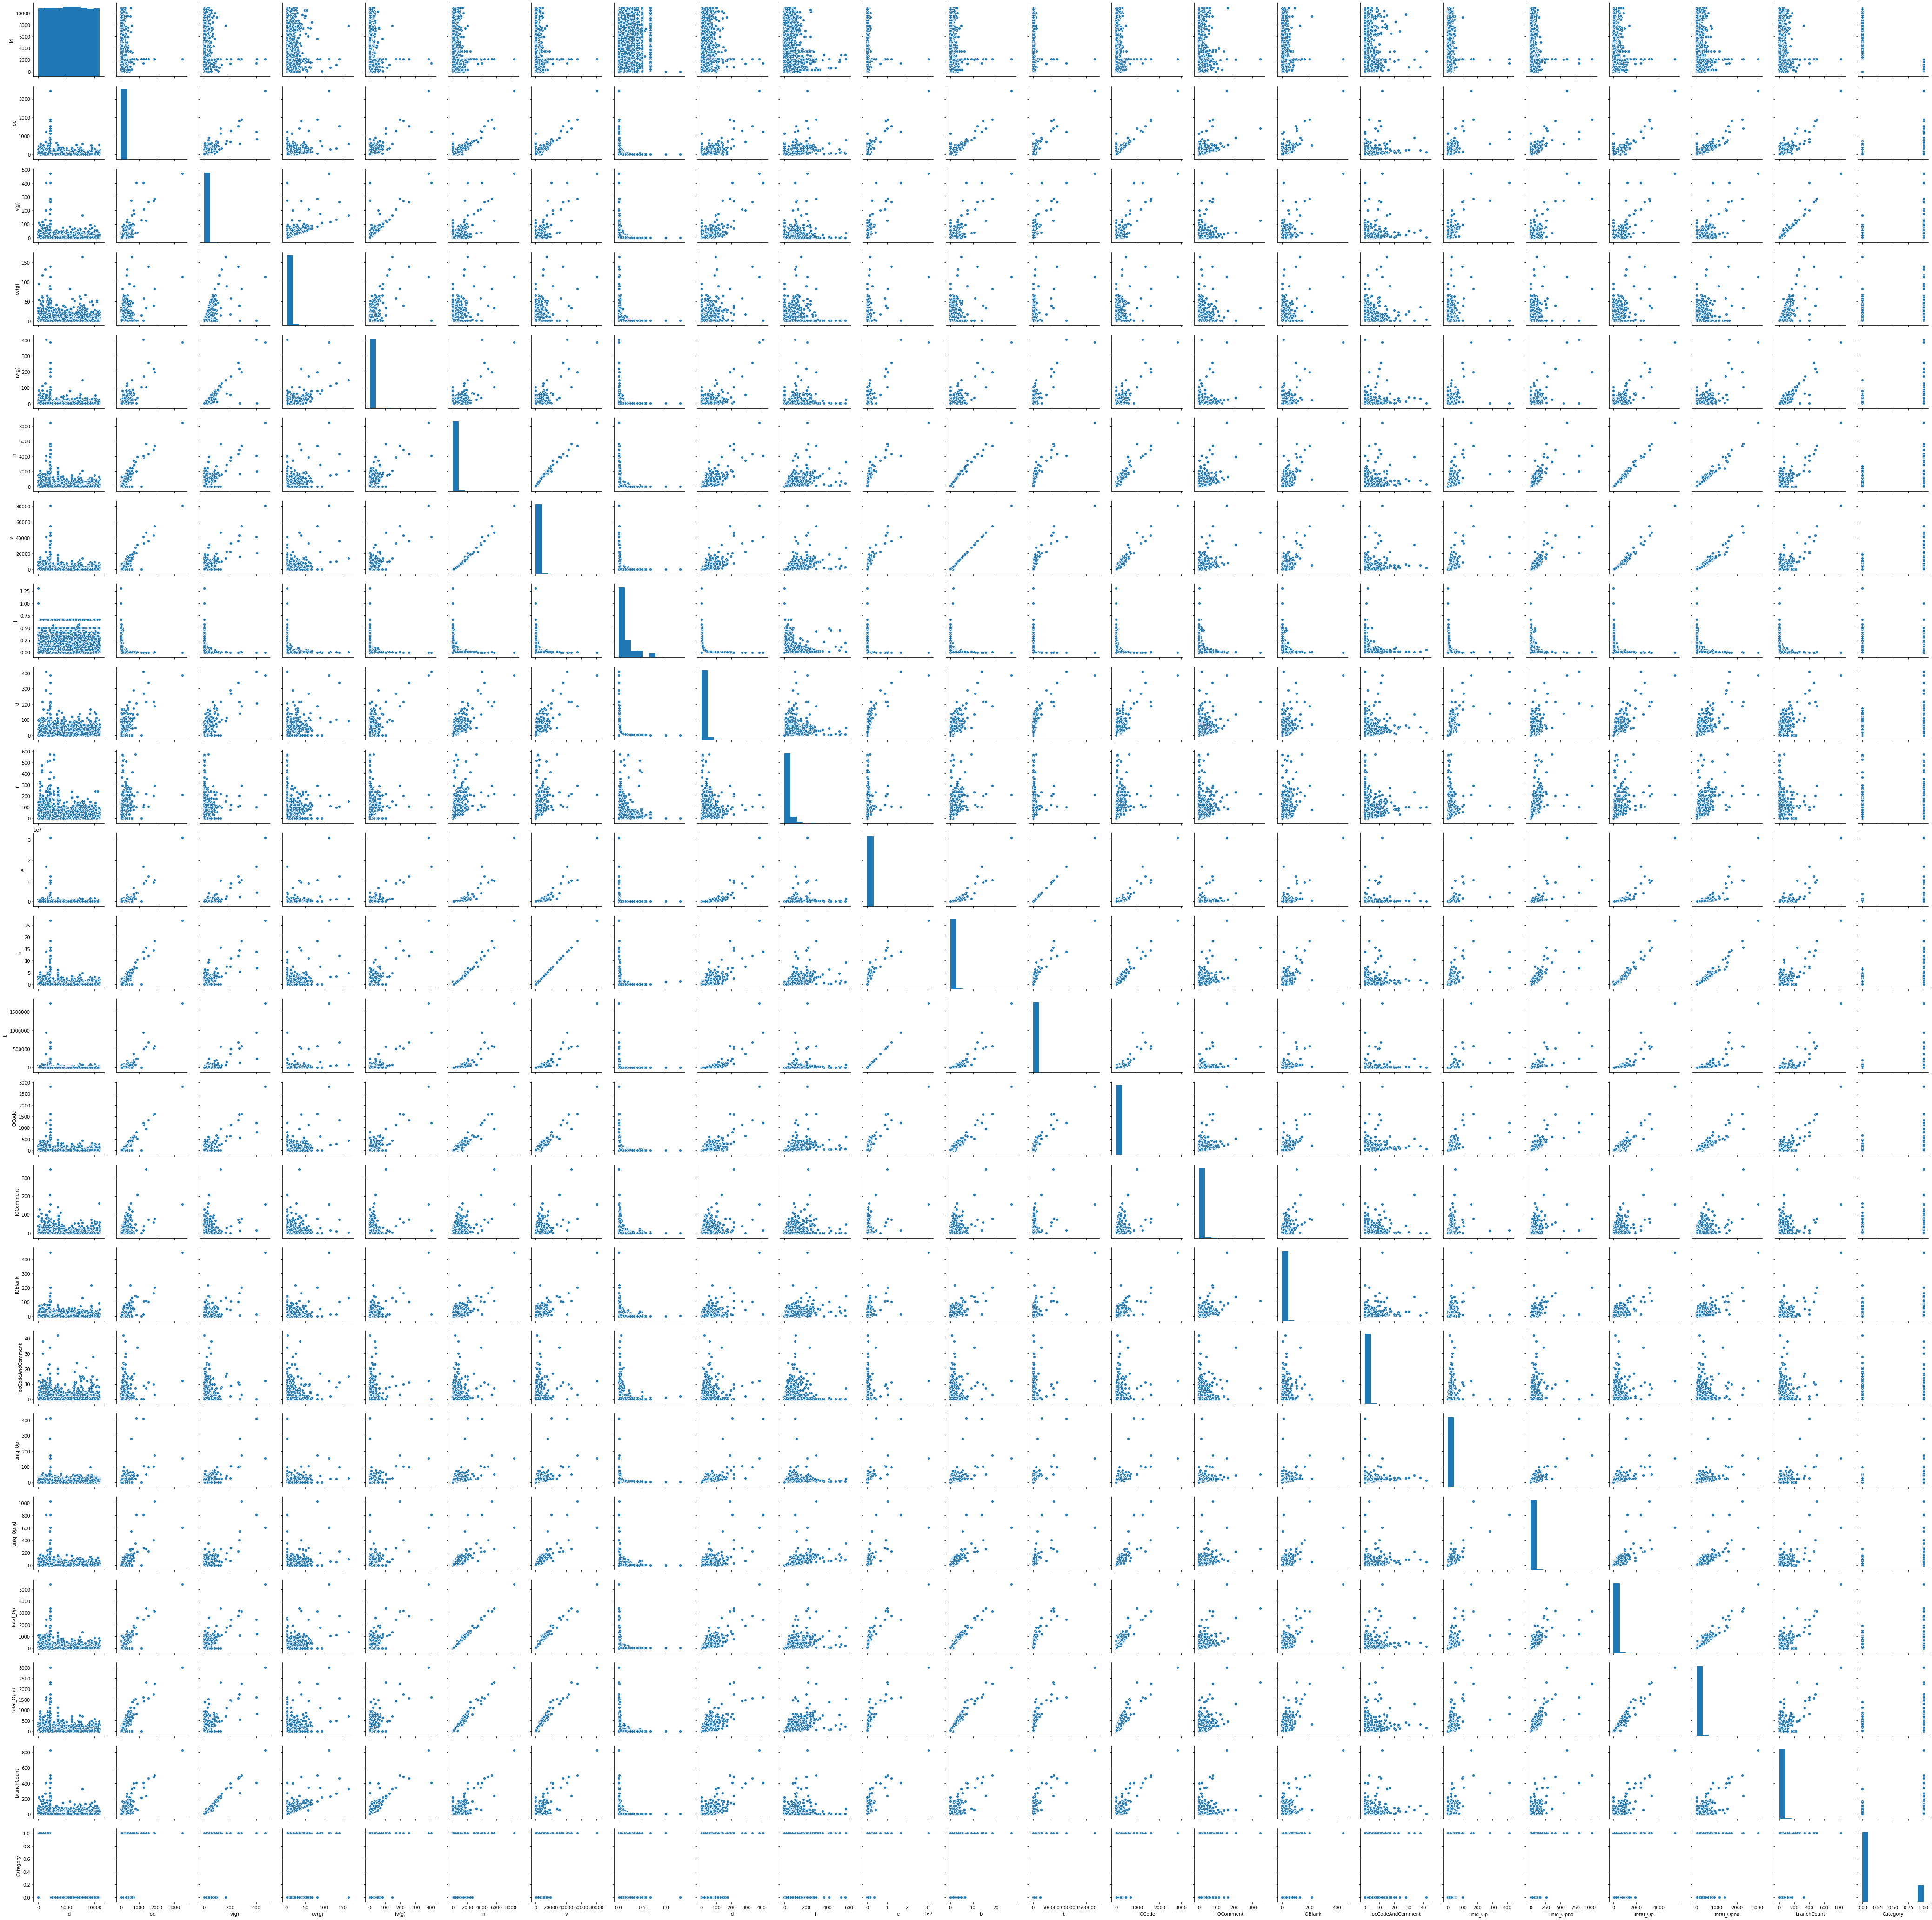

In [11]:
import seaborn as sns
sns.pairplot(df_train)

We now check the degree of skew in the variables distribution and sort them in descending order of skew levels. 

In [12]:
skew_feats = df_train[columns].skew().sort_values(ascending=False)
skewness= pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
t,45.066806
e,45.066806
iv(g),21.893595
lOCode,18.076244
v,16.079418
b,16.071199
v(g),15.701761
v(g),15.701761
loc,15.471217
uniq_Op,15.236723


# Data Preparation
We would not convert the dtaa into numpy arrays for Customer IDs, Inputs, and Output.

In [14]:
#The data is now converted to the usable range for our algorithm. Converting it into numpy array now.
id_=df_train.iloc[:,0].values # column of customer id
X = df_train.iloc[:,1:-1].values # the inputs
y = df_train.iloc[:,-1].values # column of the output

# Standard Scaling
It is clear from the above information that the variable 't' has most skewed distribution and the variable 'l' has the least skewed distribution. 
<br>
<br> We would therefore need to do Standard Scaling using the StandardScaler function. This function converts all the variables to a fixed range between 0 and 1, so the weightages are evenly distributed while applying Machine Learning algorithms later.

In [18]:
# Applying standard scalar to the features
from sklearn.preprocessing import StandardScaler
X_scale=df_train.drop(['Id','Category'],axis=1)
scaler=StandardScaler()
df_train_normalized=scaler.fit_transform(X_scale)

All the features have now been converted to the range between 0 and 1 i.e. Scaled to 0-1 range. 
<br> We can again check for the description of data centrality and dispersion to understand it after conversion.

# Algorithms Used
Based on the applicability of algorithms in the given table, we use the following algorithms in our model and compare their outputs:
<br><b>a) k-Nearest-Neighbour</b> - This algorithm works on the principle of proximity of instances and their relative distance or proximity makes them more likely to belong to the same class.
<br><b>b) Linear SVM (Support Vector Machines)</b> - This algorithm finds a line that separates the two classes in such a way that the nearest points in each class from the line are equidistant from the line separating them.
<br><b>c) Radial Basis Function</b> - We would use the RBF function as well as the instances may not be possible to be classified using a linear function, so we might need to convert it from Cartesian(x1,x2) to Vector(α,Θ) form.
<br><b>d) XG Boost</b> - It is considered a scalable and accurate implementation of gradient boosting machines and it has proven to push the limits of computing power for boosted trees algorithms as it was built and developed for the sole purpose of model performance and computational speed.
<br><b>e) Decision Tree</b> - This is ideal for classification as it identifies the attttribute that best classifies data, uses that attribute as the root , and repeats the process for each branch.
<br><b>f) Random Forest</b> - It consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model's prediction.
<br><b>g) MLP (Multi Layer Perceptron)</b> - MLP is a deep learning method that is characterised by multiple layer of input nodes connected in a graphical manner with output layers.
<br><b>h) AdaBoost (Adaptive Boosting)</b> - It is an adaptive algorithm that tweaks the weak learners in favour of thise instances that were misclassfied by the previous classifiers.
<br><b>i) Gaussian Naive Bayes</b> - Assuming that the input attributes are independent of each other, this algorithm might be beset suited for such problems, also because of the fact that it needs less training data.
<br><b>j) Logistic Regression</b> - Since the dependent variable is dichotomous (binary), this must be tried as a basic ML algorithm.

# Algorithms Comparison
We would now compare the 10 algorithms mentioned in the summary, by using the following method:
<br> 1. Installed all required packages and called the libraries.
<br> 2. We created a list of classifiers for all the 10 models.
<br> 3. We fitted all models using for loop on the 'Train' dataset and employed 10-fold Cross validation.
<br> 4. We printed the mean accuracy results for all the classifiers and plotted all results on a boxplot to check their relative performance.

NN 0.791044776119403
LSVM 0.8093816631130064
RBF SVM 0.8119402985074627
XGB 0.8158848614072495
DTree 0.8123667377398721
RF 0.8149253731343282
MLP 0.8139658848614072
AdB 0.8109808102345415
NB 0.8053304904051174
LR 0.8146055437100213


<Figure size 1944x1440 with 0 Axes>

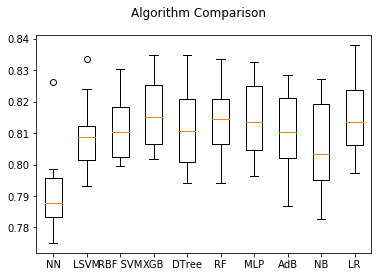

In [19]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

names = ["NN", "LSVM", "RBF SVM","XGB",
         "DTree", "RF", "MLP", "AdB",
         "NB", "LR"]

classifiers = [
    KNeighborsClassifier(3),                                              #Nearest Neighbors
    SVC(kernel="linear", C=0.025),                                        #Linear SVM
    SVC(gamma=2, C=1),                                                    #RBF SVM
    XGBClassifier(),                                                      #XGBoost
    DecisionTreeClassifier(max_depth=5),                                  #Decision Tree
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), #Random Forest
    MLPClassifier(alpha=1, max_iter=1000),                                #MultiLayerPerceptron
    AdaBoostClassifier(),                                                 #AdaBoost
    GaussianNB(),                                                         #Naive Bayes
    LogisticRegression()]                                                 #Logistic Regression


dataset = (df_train_normalized, y)
id_=df_train.iloc[:,0].values # column of customer id

datasets = [dataset]
results = []
scoring = 'accuracy'

figure = plt.figure(figsize=(27, 20))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        kfold = model_selection.KFold(n_splits=10, random_state=42)
        cv_results = model_selection.cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        print(name, cv_results.mean())
        
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<b> Analysing the Results</b>
<br>It is clear from the results that 7 out of 10 models have shown an accuracy of 1.00 and one more algorithm has given 0.995 accuracy. We planned to use Bagging, Boosting and Blending of algorithms had this accuracy been lower, but since it is already the maximum, we have chosen XGBoost algorithm for our final model. The reason being that XG Boost uses Boosting algorithm technique already.

# Parameter Tuning
We tried to use parameter tuning in the XG Boost model and when executed, it took almost 35 minutes to run. Since it was not improving the accuracy anyway, we have not used it in the final model.

We now check that which of the 21 variables are more important than the others and would plot them using plot_importance function.

In [20]:
# Variable importance plot 
from xgboost import plot_importance
plot_importance(xgb1)

NameError: name 'xgb1' is not defined

In [21]:
#Additional sklearn functions which would be used for tuning steps
from sklearn import metrics   
from sklearn.model_selection import cross_val_score, GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = df_train
target = 'Category'
IDcol = 'Id'

In [22]:
#We start by defining a function for the XGBoost analysis
def modelfit(alg, dtrain, predictors,target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))

In [23]:
#Step 1: Fix learning rate and number of estimators
#Choose all predictors except target

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
predictors = [x for x in df_train.columns if x not in [target,IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, df_train, predictors, target)

Accuracy : 0.8532
AUC Score (Train): 0.852211


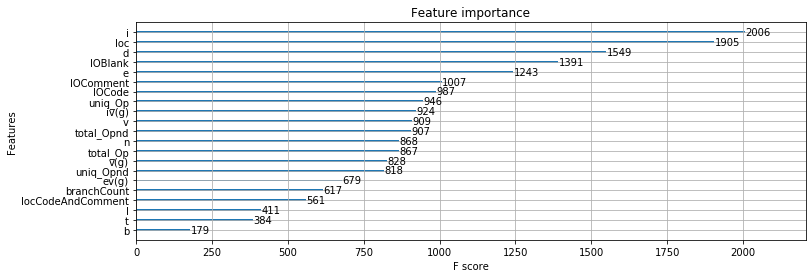

In [24]:
# Variable importance plot 
from xgboost import plot_importance
plot_importance(xgb1)

In [ ]:
# Step 2: Tune max depth and min child weight

param_test1 = {
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,10,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=3000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(df_train[predictors],df_train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
#values for max_depth = 3 and for min_child_weight= 5

In [ ]:
# setting max depth as 3 and min child weight as 1 from above

#Step3 : tune Gamma 

param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=3000, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(df_train[predictors],df_train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_
# value for gamma comes to be : 0.2

In [ ]:
#Step 4(a): Tune subsample and colsample_bytree

param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=3000, max_depth=3,
 min_child_weight=1, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(df_train[predictors],df_train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_
#subsample: 0.7, colsample: 0.9

In [ ]:
#step 4(b) : tuning by increments of .5

param_test5 = {
 'subsample':[i/100.0 for i in range(60,80,5)],
 'colsample_bytree':[i/100.0 for i in range(60,80,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=3000, max_depth=3,
 min_child_weight=1, gamma=0.2, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(df_train[predictors],df_train[target])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_
#optimum for subsample : 0.65, colsample = 0.85

In [ ]:
#Step 5: Tuning regularization parameters

param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=3000, max_depth=3,
 min_child_weight=1, gamma=0.2, subsample=0.65, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(df_train[predictors],df_train[target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_
#reg_alpha comes to be 1

In [25]:
#We have tuned the parameters from steps 2 to 5 and incorporated the results in the next section 
#because executing these steps repeatedly will hamper the model speed drastically 
#Final Check: Reducing LEarning rate and increase trees
xgbtest = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=5,
 min_child_weight=3,
 gamma=0.2,
 subsample=0.65,
 colsample_bytree=0.85,
 reg_alpha=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgbtest, df_train, predictors, target)

Accuracy : 0.8547
AUC Score (Train): 0.856438


<b>Inferences from Parameter Tuning</b>
<br>When we used 'Category' variable in Scaling, then the model accuracy was 1.00 without parameter tuning. However, since that is a flawed logic, we removed 'Category' from the Standard Scaling and checked the accuracy, it was coming to 0.8159. Now, we employed the parameter tuning methods that improved this accuracy to 0.8564.

# Creating the Final File for Upload
<br>1. We created the classifier for XG Boost, trained it with the complete Train dataset and fitted the model for the Test dataset.
<br>2. We now downloaded the final file for upload in Kaggle and get the actual accuracy on 30 percent Test dataset.

In [28]:
#We prepare test data for fitting into the model obtained by removing the column Id
df_test_final = df_test.drop(['Id'],axis=1)
#We convert test data into numpy arrays
id_person = df_test.iloc[:,0].values # column of customer id
X_test_final = df_test.iloc[:,1:].values # column of the inputs
X_test_normalized=scaler.fit_transform(X_test_final)

In [29]:
# Predict the target on the test dataset
predict_test = xgbtest.predict(df_test_final)
print('\nTarget on test data',predict_test) 
import pandas as pd
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', id_person.astype(int))
Prediction.insert(1, 'Category', predict_test.astype(int))
Prediction.to_csv("XGboost_Kaggle.csv", index=False)
Prediction


Target on test data [0 1 0 ... 0 0 0]


,Id,Category
0,10490,0
1,7211,1
2,7109,0
3,5567,0
4,6677,0
...,...,...
1495,8407,0
1496,186,0
1497,1761,0
1498,3776,0


# Conclusions and Learnings
It may be concluded that the final model using XG Boost algorithm is giving an expected level of performance. However, we are quite confident of the accuracy achived as we have tried to follow the recommended process of the ML algorithm.

<b>Strengths</b>
<br>The final model employed has the following strengths:
<br>1. Very high accuracy on both Training and Test dataset.
<br>2. The model has used Data preprocessing, preparation, and standardisation which improves the efficiency and accuracy.
<br>3. Use of a large number of algorithms for comparison has given a fair idea of what works and what  does not in this case.

<br><b>Weaknesses</b>
<br>The final model might have the following weaknesses:
<br>1. Since the final accuracy using XGBoost is too high, there is always a risk of Overfitting, which we could not identify.
<br>2. We have finally used parameter tuning in the model, which has reduced the accuacy. If we scale 'Category' and do not use parameter tuning then the model accuracy would go to 1.00.
<br>3. We wanted to club various models by using the Stacking or Blending techniques, but could not due to the high model accuracy without using it.